In [1]:
from dataclasses import dataclass
from typing import List, Optional, Tuple
from pathlib import Path
from astropy.table import Table

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
from xarray import DataArray, Variable
import xarray
import matplotlib

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150

from pySDHDF import SDHDF, flagging
from scipy import stats
import xarray as xr
from typing import List, Optional, Tuple, Union, Callable

In [2]:
data = SDHDF("/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf", parallel=True)


2023-01-27 15:31:57,782 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/rg/tk14ndkj435d8d1yj25dbz1w00p7kq/T/dask-worker-space/worker-cpv_drcw', purging
2023-01-27 15:31:57,782 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/rg/tk14ndkj435d8d1yj25dbz1w00p7kq/T/dask-worker-space/worker-wgojzjvn', purging
2023-01-27 15:31:57,783 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/rg/tk14ndkj435d8d1yj25dbz1w00p7kq/T/dask-worker-space/worker-hyktk0nt', purging
2023-01-27 15:31:57,783 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/rg/tk14ndkj435d8d1yj25dbz1w00p7kq/T/dask-worker-space/worker-8tu7pvxc', purging
2023-01-27 15:31:57,784 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/rg/tk14ndkj435d8d1yj25dbz1w00p7kq/T/dask-worker-space/worker-4i5x82sg', purging
2023-01-27 15:31:57,784 - distributed.diskutils - INFO - Found st

Dask dashboard at: http://127.0.0.1:8787/status


/Users/tho822/dev/sdhdf_tools/python/pySDHDF/sdhdf.py:196: UserWarning: 
                    No flags found for sub-band 'band_SB0' in file '/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf'!
                    SDHDF version is 1.9.
                    Flags will be set to all zeros.
                    
  warnings.warn(
/Users/tho822/dev/sdhdf_tools/python/pySDHDF/sdhdf.py:196: UserWarning: 
                    No flags found for sub-band 'band_SB1' in file '/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf'!
                    SDHDF version is 1.9.
                    Flags will be set to all zeros.
                    
  warnings.warn(
/Users/tho822/dev/sdhdf_tools/python/pySDHDF/sdhdf.py:196: UserWarning: 
                    No flags found for sub-band 'band_SB2' in file '/Users/tho822/data/parkes/uwl_200406_121917.extract.hdf'!
                    SDHDF version is 1.9.
                    Flags will be set to all zeros.
                    
  warnings.warn(
/Users/

In [5]:
data.write("test.hdf", overwrite=True)

Writing beams:   0%|          | 0/1 [00:00<?, ?it/s]

Writing subbands:   0%|          | 0/4 [00:00<?, ?it/s]

No flags in definition
Saving flags to /astronomy_data/flags


/Users/tho822/dev/sdhdf_tools/python/pySDHDF/sdhdf.py:418: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['TIME_DB', 'UTC', 'UT_DATE', 'AEST', 'RA_STR', 'DEC_STR', 'metadata'], dtype='object')]

  self.astronomy_dataset.metadata.to_dataframe().to_hdf(


No flags in definition
Saving flags to /astronomy_data/flags
No flags in definition
Saving flags to /astronomy_data/flags


/Users/tho822/dev/sdhdf_tools/python/pySDHDF/sdhdf.py:418: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['TIME_DB', 'UTC', 'UT_DATE', 'AEST', 'RA_STR', 'DEC_STR', 'metadata'], dtype='object')]

  self.astronomy_dataset.metadata.to_dataframe().to_hdf(
/Users/tho822/dev/sdhdf_tools/python/pySDHDF/sdhdf.py:418: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['TIME_DB', 'UTC', 'UT_DATE', 'AEST', 'RA_STR', 'DEC_STR', 'metadata'], dtype='object')]

  self.astronomy_dataset.metadata.to_dataframe().to_hdf(


No flags in definition
Saving flags to /astronomy_data/flags


/Users/tho822/dev/sdhdf_tools/python/pySDHDF/sdhdf.py:418: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['TIME_DB', 'UTC', 'UT_DATE', 'AEST', 'RA_STR', 'DEC_STR', 'metadata'], dtype='object')]

  self.astronomy_dataset.metadata.to_dataframe().to_hdf(


Writing metadata:   0%|          | 0/4 [00:00<?, ?it/s]

Written metadata:beam_params to test.hdf
Written metadata:history to test.hdf
Written metadata:primary_header to test.hdf
Written metadata:software to test.hdf


Writing config:   0%|          | 0/1 [00:00<?, ?it/s]

Written config:backend to test.hdf


In [6]:
test = SDHDF("test.hdf", parallel=True)

/Users/tho822/miniconda3/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55869 instead
  warnings.warn(


Dask dashboard at: http://127.0.0.1:55869/status


KeyError: "SDHDF version not found in file 'test.hdf'"

In [9]:
from astropy.table import QTable

In [13]:
QTable(data.beam_0.band_SB0.astronomy_dataset.metadata.data)

col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24
object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
0.262,2020-04-06T12:19:17.26Z,58945.51339400001,12:19:17.26,2020-04-06,22:19:18.16,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.2164,39.352,50.648,0.0,0.0,0.0,0.0,-0.3738,0.0738,340.7923,-154.2,9.0,98.6214
0.7859999999999999,2020-04-06T12:19:17.79Z,58945.5134,12:19:17.79,2020-04-06,22:19:18.69,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.2111,39.352,50.648,0.0,0.0,0.0,0.0,-0.3214,0.0214,340.7945,-154.2,9.0,103.8643
1.311,2020-04-06T12:19:18.31Z,58945.51340599999,12:19:18.31,2020-04-06,22:19:19.21,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.2074,39.3504,50.6496,0.0,0.0,0.0,0.0,-0.3,0.0,340.7967,-154.2,9.0,102.8928
1.835,2020-04-06T12:19:18.84Z,58945.513412,12:19:18.84,2020-04-06,22:19:19.73,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.2048,39.3478,50.6522,0.0,0.0,0.0,0.0,-0.3,0.0,340.7989,-154.2,9.0,97.6499
2.359,2020-04-06T12:19:19.36Z,58945.513419,12:19:19.36,2020-04-06,22:19:20.26,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.2022,39.347,50.653,0.0,0.0,0.0,0.0,-0.3,0.0,340.801,-154.2,9.0,97.4372
2.884,2020-04-06T12:19:19.88Z,58945.513425,12:19:19.88,2020-04-06,22:19:20.78,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.1996,39.347,50.653,0.0,0.0,0.0,0.0,-0.3,0.0,340.8032,-154.2,9.0,99.5343
3.408,2020-04-06T12:19:20.41Z,58945.51343099999,12:19:20.41,2020-04-06,22:19:21.30,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.197,39.347,50.653,0.0,0.0,0.0,0.0,-0.3,0.0,340.8054,-154.2,9.0,98.3685
3.932,2020-04-06T12:19:20.93Z,58945.513437,12:19:20.93,2020-04-06,22:19:21.83,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.1943,39.347,50.653,0.0,0.0,0.0,0.0,-0.3,0.0,340.8076,-154.2,9.0,96.2714
4.456,2020-04-06T12:19:21.46Z,58945.513442999996,12:19:21.46,2020-04-06,22:19:22.35,12:29:06.70,+02:03:08.60,187.2779,2.0524,289.951,64.36,31.1917,39.3447,50.6553,0.0,0.0,0.0,0.0,-0.3,0.0,340.8098,-154.2,9.0,97.8258


In [15]:
data.beam_0.band_SB0.astronomy_dataset.metadata.to_dataframe()

ELAPSED_TIME                  TIME_DB           MJD          UTC  \
time meta                                                                     
0    0            0.262  2020-04-06T12:19:17.26Z  58945.513394  12:19:17.26   
     1            0.262  2020-04-06T12:19:17.26Z  58945.513394  12:19:17.26   
     2            0.262  2020-04-06T12:19:17.26Z  58945.513394  12:19:17.26   
     3            0.262  2020-04-06T12:19:17.26Z  58945.513394  12:19:17.26   
     4            0.262  2020-04-06T12:19:17.26Z  58945.513394  12:19:17.26   
...                 ...                      ...           ...          ...   
109  20          57.410  2020-04-06T12:20:14.41Z  58945.514056  12:20:14.41   
     21          57.410  2020-04-06T12:20:14.41Z  58945.514056  12:20:14.41   
     22          57.410  2020-04-06T12:20:14.41Z  58945.514056  12:20:14.41   
     23          57.410  2020-04-06T12:20:14.41Z  58945.514056  12:20:14.41   
     24          57.410  2020-04-06T12:20:14.41Z  58945.514056  12:20:14.41   

              UT_DATE         AEST       RA_STR       DEC_STR    RA_DEG  \
time meta                                                                 
0    0     2020-04-06  22:19:18.16  12:29:06.70  +02:03:08.60  187.2779   
     1     2020-04-06  22:19:18.16  12:29:06.70  +02:03:08.60  187.2779   
     2     2020-04-06  22:19:18.16  12:29:06.70  +02:03:08.60  187.2779   
     3     2020-04-06  22:19:18.16  12:29:06.70  +02:03:08.60  187.2779   
     4     2020-04-06  22:19:18.16  12:29:06.70  +02:03:08.60  187.2779   
...               ...          ...          ...           ...       ...   
109  20    2020-04-06  22:20:15.30  12:29:04.98  +02:03:13.06  187.2708   
     21    2020-04-06  22:20:15.30  12:29:04.98  +02:03:13.06  187.2708   
     22    2020-04-06  22:20:15.30  12:29:04.98  +02:03:13.06  187.2708   
     23    2020-04-06  22:20:15.30  12:29:04.98  +02:03:13.06  187.2708   
     24    2020-04-06  22:20:15.30  12:29:04.98  +02:03:13.06  187.2708   

           DEC_DEG  ...  DEC_OFFSET  AZ_OFFSET  EL_OFFSET  AZ_DRIVE_RATE  \
time meta           ...                                                    
0    0      2.0524  ...         0.0        0.0        0.0        -0.3738   
     1      2.0524  ...         0.0        0.0        0.0        -0.3738   
     2      2.0524  ...         0.0        0.0        0.0        -0.3738   
     3      2.0524  ...         0.0        0.0        0.0        -0.3738   
     4      2.0524  ...         0.0        0.0        0.0        -0.3738   
...            ...  ...         ...        ...        ...            ...   
109  20     2.0536  ...         0.0        0.0        0.0        -0.3000   
     21     2.0536  ...         0.0        0.0        0.0        -0.3000   
     22     2.0536  ...         0.0        0.0        0.0        -0.3000   
     23     2.0536  ...         0.0        0.0        0.0        -0.3000   
     24     2.0536  ...         0.0        0.0        0.0        -0.3000   

           ZE_DRIVE_RATE  HOUR_ANGLE  PARA_ANGLE  WIND_DIR  WIND_SPD  \
time meta                                                              
0    0            0.0738    340.7923      -154.2    9.0000   98.6214   
     1            0.0738    340.7923      -154.2    9.0000   98.6214   
     2            0.0738    340.7923      -154.2    9.0000   98.6214   
     3            0.0738    340.7923      -154.2    9.0000   98.6214   
     4            0.0738    340.7923      -154.2    9.0000   98.6214   
...                  ...         ...         ...       ...       ...   
109  20           0.0590    341.0382      -154.5    9.5905   97.6381   
     21           0.0590    341.0382      -154.5    9.5905   97.6381   
     22           0.0590    341.0382      -154.5    9.5905   97.6381   
     23           0.0590    341.0382      -154.5    9.5905   97.6381   
     24           0.0590    341.0382      -154.5    9.5905   97.6381   

                          metadata  
time meta                           
0    0 

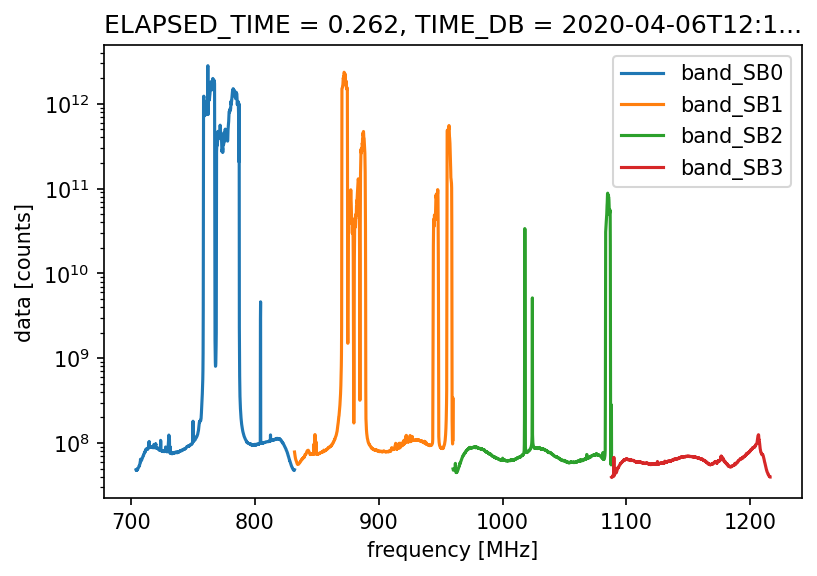

In [22]:
ax = data.plot_wide(beam=0, time=0, flag=True)
ax.set_yscale("log")

In [23]:
data.flag_persistent_rfi()

Flagging persistent RFI:   0%|          | 0/31 [00:00<?, ?it/s]

In [24]:
data.auto_flag_rfi(n_windows=50, sigma=3)
data.metadata.history

Flagging persistent RFI:   0%|          | 0/31 [00:00<?, ?it/s]

Flagging beams:   0%|          | 0/1 [00:00<?, ?it/s]

Flagging subbands:   0%|          | 0/4 [00:00<?, ?it/s]

/Users/tho822/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,DATE,PROC,PROC_DESCR,PROC_ARGS,PROC_HOST
0,2020-04-07-10:47:21,sdhdf_writer,None,Write SDHDF format file,euryale.atnf.csiro.au
1,2020-04-07-10:47:21,metadata_query,Query the observational metadata,None,dalmore.atnf.csiro.au
0,2023-01-27-14:19:04,flag_persistent_rfi,An SDHDF data object\n\n Args:\n fil...,{'filename': '/Users/tho822/data/parkes/uwl_20...,athom.hub
0,2023-01-27-14:19:05,flag_persistent_rfi,An SDHDF data object\n\n Args:\n fil...,{'filename': '/Users/tho822/data/parkes/uwl_20...,athom.hub
0,2023-01-27-14:19:13,autoflag,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB0', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:19:19,autoflag,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB1', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:19:25,autoflag,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB2', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:19:33,autoflag,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB3', 'filename': '/Users/tho8...",athom.hub


In [13]:
data.decimate(bins=1.0, use_median=True)
data.metadata.history

Decimating beams:   0%|          | 0/1 [00:00<?, ?it/s]

Decimating subbands:   0%|          | 0/4 [00:00<?, ?it/s]

Asked for a bin width of 1.0 MHz
Dimension frequency has range 704.0 to 832.0: 128.0 MHz
Using 128 channels per bin
Asked for a bin width of 1.0 MHz
Dimension frequency has range 832.0 to 960.0: 128.0 MHz
Using 128 channels per bin
Asked for a bin width of 1.0 MHz
Dimension frequency has range 960.0 to 1088.0: 128.0 MHz
Using 128 channels per bin
Asked for a bin width of 1.0 MHz
Dimension frequency has range 1088.0 to 1216.0: 128.0 MHz
Using 128 channels per bin


,DATE,PROC,PROC_DESCR,PROC_ARGS,PROC_HOST
0,2020-04-07-10:47:21,sdhdf_writer,None,Write SDHDF format file,euryale.atnf.csiro.au
1,2020-04-07-10:47:21,metadata_query,Query the observational metadata,None,dalmore.atnf.csiro.au
0,2023-01-27-14:17:18,decimate,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB0', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:17:18,decimate,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB1', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:17:19,decimate,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB2', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:17:19,decimate,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB3', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:17:36,decimate,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB0', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:17:36,decimate,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB1', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:17:36,decimate,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB2', 'filename': '/Users/tho8...",athom.hub
0,2023-01-27-14:17:37,decimate,An SDHDF sub-band data object\n\n Args:\n ...,"{'label': 'band_SB3', 'filename': '/Users/tho8...",athom.hub


In [15]:
data.beam_0.band_SB0.astronomy_dataset.frequency

<xarray.DataArray 'frequency' (frequency: 8)>
array([711.94525, 727.9609 , 743.97656, 759.9922 , 776.0078 , 792.02344,
       808.0391 , 824.05475], dtype=float32)
Coordinates:
  * frequency  (frequency) float32 711.9 728.0 744.0 760.0 ... 792.0 808.0 824.1
Attributes:
    units:    MHz

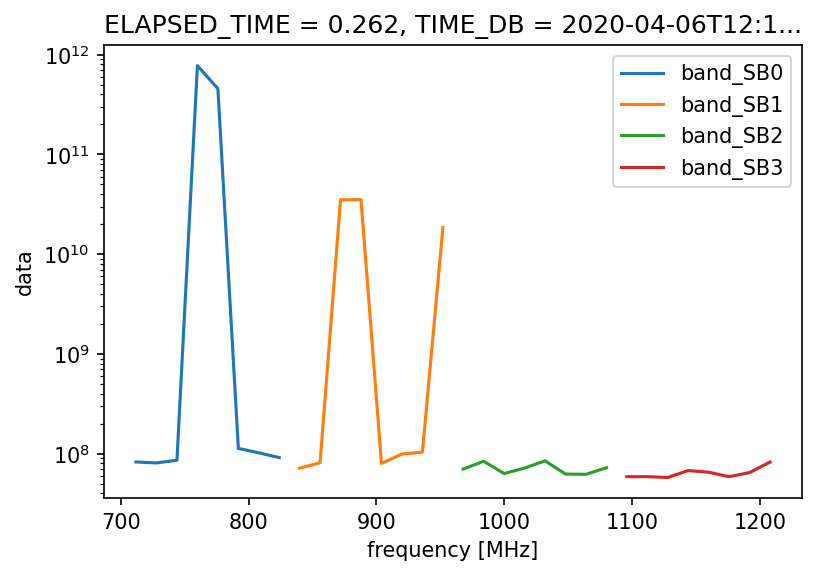

In [16]:
ax = data.plot_wide(beam=0, time=0, flag=True)
ax.set_yscale("log")

<AxesSubplot:xlabel='frequency [MHz]', ylabel='time'>

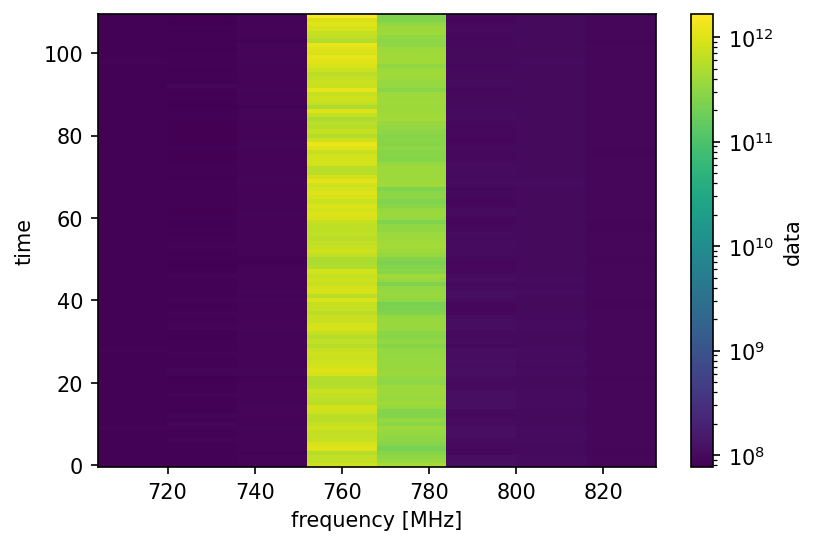

In [20]:
data.beam_0.band_SB0.plot_waterfall(flag=True, norm=plt.cm.colors.LogNorm())

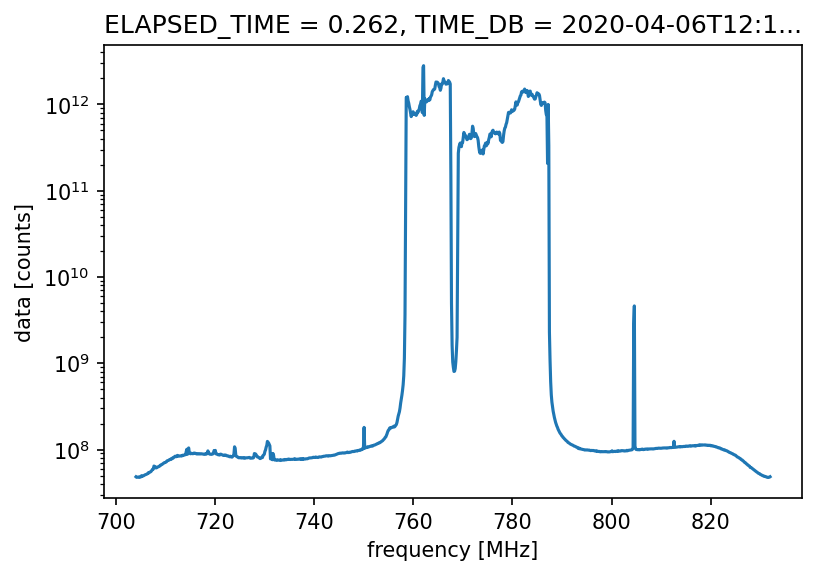

In [ ]:
ax = data.beam_0.band_SB0.plot_spectrum(time=0,flag=False,)
ax.set_yscale("log")

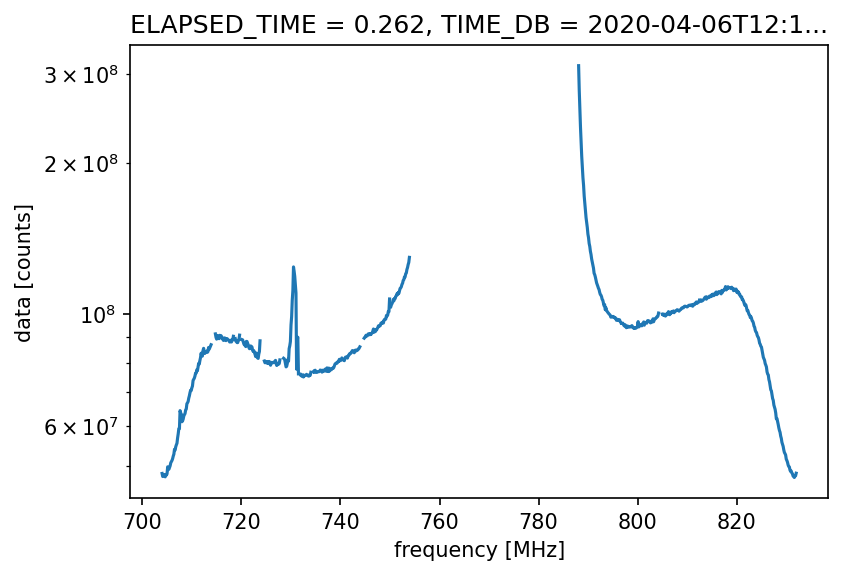

In [ ]:
ax = data.beam_0.band_SB0.plot_spectrum(time=0,flag=True,)
ax.set_yscale("log")

In [ ]:
sigma=3
n_windows=100

In [ ]:
dset = data.beam_0.band_SB0.dataset.where(data.beam_0.band_SB0.dataset.flag==0)

grp = dset.groupby_bins("frequency", n_windows)

In [ ]:
data_xr_flg = dset.data.where(
    ~dset.flag.astype(bool)
)
# Set chunks for parallel processing
chunks = {d:1 for d in data_xr_flg.dims}
chunks["frequency"] = len(dset.data.frequency)
data_xr_flg = data_xr_flg.chunk(chunks)

In [ ]:
mask = xr.apply_ufunc(
    flagging.box_filter,
    data_xr_flg,
    input_core_dims=[["frequency"]],
    output_core_dims=[["frequency"]],
    kwargs={"sigma": sigma, "n_windows": n_windows},
    dask="parallelized",
    vectorize=True,
    output_dtypes=(bool),
)

In [ ]:
dset.flag.isel(time=0, polarization=0).plot()

In [ ]:
def box_filter(x, sigma=3, maxiters=None):
    filt = sigma_clip(x.data, sigma=sigma, maxiters=maxiters, masked=True)
    x.flag[filt.mask] = 1
    return x

In [ ]:
for i in g.data:
    print(i)
    break

In [ ]:
grp.map(box_filter)

In [ ]:
g.data.isel(polarization=0).plot()

In [ ]:
test.isel(polarization=0, time=0).plot()

In [ ]:
# Do some flagging
data.beam_0.band_SB0.dataset.flag.loc[dict(frequency=slice(750, 790))] = 1
# flag_xr.loc[dict(frequency=slice(750, 790))] = 1

In [ ]:
test.plot_waterfall(beam=0, subband=0, flag=True, norm=plt.cm.colors.LogNorm())

In [ ]:
data.plot_wide(beam=0, time=0, flag=True)
plt.yscale("log")

In [ ]:
data.metadata.history.concat()

In [ ]:
sub_data = data.beam_0.band_SB0.dataset.isel(polarization=0, bin=0)
sub_data = sub_data.where(sub_data.flag == 0)
sub_data.data.plot()
# plt.yscale("log")

In [ ]:
spectrum = data.beam_0.band_SB0.data.isel(time=0, polarization=0, bin=0)

In [ ]:
spectrum.frequency.values.min()

In [ ]:
cut_bins = pd.cut(
    spectrum.frequency,
    bins=np.arange(spectrum.frequency.values.min(), spectrum.frequency.values.max(), 10),
)
edges = cut_bins.categories.values
stat, bin_edges, bin_number = stats.binned_statistic(
    x = spectrum.frequency,
    values = spectrum, 
    statistic="median", 
    bins=edges.left,
)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(bin_centres, stat)
plt.yscale("log")

In [ ]:
def decimate(spectrum: np.ndarray, freq: np.ndarray, bins: Union[int, float], statistic:str="mean", axis=None) -> np.ndarray:
    if isinstance(bins, float):
        cut_bins = pd.cut(
            freq,
            bins=np.arange(freq.values.min(), freq.values.max(), 10),
        )
        edges = cut_bins.categories.values
        bins = edges.left
    stat, bin_edges, bin_number = stats.binned_statistic(
        x = freq,
        values = spectrum, 
        statistic=statistic,
        bins=bins,
    )

In [ ]:
data_xr_flg = data.beam_0.band_SB0.astronomy_dataset.data.where(
    ~data.beam_0.band_SB0.astronomy_dataset.flag.astype(bool)
)

In [6]:
dataset = data.beam_0.band_SB0.astronomy_dataset

In [7]:
dataset

<xarray.Dataset>
Dimensions:        (time: 110, frequency: 1024, polarization: 4, bin: 1,
                    meta: 25)
Coordinates: (12/26)
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    AEST           (time) object b'22:19:18.16' ... b'22:20:15.30'
    ...             ...
    ZE_DRIVE_RATE  (time) float64 0.0738 0.0214 0.0 0.0 ... 0.0837 0.1 0.1 0.059
    HOUR_ANGLE     (time) float64 340.8 340.8 340.8 340.8 ... 341.0 341.0 341.0
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
  * frequency      (frequency) float32 704.0 704.1 704.3 ... 831.7 831.9 832.0
Dimensions without coordinates: time, polarization, bin, meta
Data variables:
    data           (time, polarization, frequency, bin) float32 4.83e+07 ... ...
    flag           (time, polarization, bin, frequency) int64 0 0 0 0 ... 0 0 0
    metadata       (time, meta) object 0.262 ... 97.6381

In [65]:
dataset.data["frequency"].units

'MHz'

In [69]:
dataset.data.time

<xarray.DataArray 'time' (time: 110)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109])
Coordinates: (12/25)
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    AEST           (time) object b'22:19:18.16' ... b'22:20:15.30'
    ...             ...
    AZ_DRIVE_RATE  (time) float64 -0.3738 -0.3214 -0.3 -0.3 ... -0.3 -0.3 -0.3
    ZE_DRIVE_RATE  (time) float64 0.0738 0.0214 0.0 0.0 ... 0.0837 0.1 0.1 0.059
    HOUR_ANGLE     (time) float64 340.8 340.8 340.8 340.8 ... 341.0 341.0 341.0
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
Dimensions without coordinates: time

In [8]:
axis = "frequency"
# dataset.data[]
bins = 10.0
if isinstance(bins, float):
    # Convert to integer number of bins
    try:
        unit = dataset.data[axis].units
    except AttributeError:
        unit = "units"
    print(f"Asked for a bin width of {bins} {unit}")
    print(f"Dimension {axis} has range {dataset[axis].min()} to {dataset[axis].max()}: {dataset[axis].max() - dataset[axis].min()} {unit}")
    bins = int((dataset[axis].max() - dataset[axis].min()) / bins)
    print(f"Using {bins} bins")



Asked for a bin width of 10.0 MHz
Dimension frequency has range 704.0 to 832.0: 128.0 MHz
Using 12 bins


In [9]:
bins

12

In [119]:
def _decimate(spectrum: np.ndarray, statistic:Callable=np.mean, axis=None) -> Tuple[np.ndarray, np.ndarray]:
    # print(f"{spectrum}")
    print(f"{axis=}")
    return statistic(spectrum, axis=axis)
    # if np.isnan(spectrum).all():
    #     return statistic(spectrum), 1
    # else:
    #     mask_spec = spectrum_bin[~mask_bin.astype(bool)]
    #     return statistic(mask_spec), 0


In [199]:
def _decimate(spectrum: np.ndarray, flag_spectrum: np.ndarray, dim: str, statistic:Callable=np.mean, **kwargs) -> np.ndarray:

    def func(spectrum: np.ndarray, flag_spectrum: np.ndarray, statistic:Callable=np.mean) -> np.ndarray:
        if flag_spectrum.all():
            return statistic(spectrum)
        else:
            mask_spec = spectrum[~flag_spectrum]
            return statistic(mask_spec)
    
    return xr.apply_ufunc(
        func,
        spectrum,
        flag_spectrum,
        input_core_dims=[[dim], [dim]],
        **kwargs,
    )

    # if flag_spectrum.all():
    #     return statistic(spectrum)
    # else:
    #     mask_spec = spectrum[~flag_spectrum]
    #     return statistic(mask_spec)


In [10]:
def _decimate(dset_block, axis:str, use_median: bool=False) -> np.ndarray:
    if dset_block.flag.astype(bool).all():
        if use_median:
            data = dset_block.data.median(dim="original")
        else:
            data = dset_block.data.mean(dim="original")
        flag = xr.ones_like(data)

    else:
        if use_median:
            data = dset_block.data.where(~dset_block.flag.astype(bool)).median(dim="original", skipna=True)
        else:
            data = dset_block.data.where(~dset_block.flag.astype(bool)).mean(dim="original", skipna=True)
        flag = xr.zeros_like(data)

    if use_median:
        dset_block[axis] = dset_block[axis].median(dim="original")
    else:
        dset_block[axis] = dset_block[axis].mean(dim="original")
    dset_block["data"] = data
    dset_block["flag"] = flag
    return dset_block


In [11]:
dec_dset = dataset.coarsen(**{axis: bins}, boundary="trim").construct(**{axis: ("original", "decimated")})
chunks = {d:1 for d in dec_dset.dims}
chunks["original"] = len(dec_dset.data.original)
dec_dset = dec_dset.chunk(chunks)
template = dec_dset.sum(dim="original")
template["decimated"] = dec_dset[axis].mean(dim="original")
template = template.rename({"decimated": axis})
template

<xarray.Dataset>
Dimensions:        (time: 110, polarization: 4, frequency: 12, bin: 1, meta: 25)
Coordinates:
  * frequency      (frequency) float32 767.1 767.2 767.3 ... 768.2 768.3 768.4
Dimensions without coordinates: time, polarization, bin, meta
Data variables: (12/28)
    ELAPSED_TIME   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TIME_DB        (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    MJD            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    UTC            (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    UT_DATE        (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    AEST           (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    ...             ...
    PARA_ANGLE     (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    WIND_DIR       (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    WIND_SPD       (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    data           (time, polarization, frequency, bin) float32 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
    flag           (time, polarization, bin, frequency) int64 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
    metadata       (time, meta) object dask.array<chunksize=(1, 1), meta=np.ndarray>

In [12]:
reduced_dset = dec_dset.map_blocks(_decimate, kwargs=dict(axis=axis), template=template)
reduced_dset

<xarray.Dataset>
Dimensions:        (frequency: 12, time: 110, polarization: 4, bin: 1, meta: 25)
Coordinates:
  * frequency      (frequency) float64 767.1 767.2 767.3 ... 768.2 768.3 768.4
Dimensions without coordinates: time, polarization, bin, meta
Data variables: (12/28)
    ELAPSED_TIME   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    TIME_DB        (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    MJD            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    UTC            (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    UT_DATE        (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    AEST           (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    ...             ...
    PARA_ANGLE     (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    WIND_DIR       (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    WIND_SPD       (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    data           (time, polarization, frequency, bin) float32 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
    flag           (time, polarization, bin, frequency) int64 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
    metadata       (time, meta) object dask.array<chunksize=(1, 1), meta=np.ndarray>

In [26]:
dataset.coarsen(**{axis: bins}, boundary="trim").mean()

<xarray.Dataset>
Dimensions:        (time: 110, polarization: 4, frequency: 85, bin: 1, meta: 25)
Coordinates: (12/26)
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    AEST           (time) object b'22:19:18.16' ... b'22:20:15.30'
    ...             ...
    ZE_DRIVE_RATE  (time) float64 0.0738 0.0214 0.0 0.0 ... 0.0837 0.1 0.1 0.059
    HOUR_ANGLE     (time) float64 340.8 340.8 340.8 340.8 ... 341.0 341.0 341.0
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
  * frequency      (frequency) float32 704.7 706.2 707.7 ... 827.8 829.3 830.8
Dimensions without coordinates: time, polarization, bin, meta
Data variables:
    data           (time, polarization, frequency, bin) float32 4.831e+07 ......
    flag           (time, polarization, bin, frequency) float64 0.0 0.0 ... 0.0
    metadata       (time, meta) object 0.262 ... 97.6381

In [122]:
flagged = dataset.where(dataset.flag == 0)
unflagged = dataset

In [132]:
unflagged_dec = unflagged.coarsen(**{axis: bins}, boundary="trim").construct(**{axis: ("decimated", "original")}).mean(dim="original", skipna=True).rename({"decimated": axis})
flagged_dec = flagged.coarsen(**{axis: bins}, boundary="trim").construct(**{axis: ("decimated", "original")}).mean(dim="original", skipna=True).rename({"decimated": axis})
axis_dec = unflagged[axis].coarsen(**{axis: bins}, boundary="trim").mean()
unflagged_dec[axis] = axis_dec
flagged_dec[axis] = axis_dec

In [200]:
new_flag = flagged_dec.flag.fillna(1)

In [201]:
new_data = flagged_dec.data
# fill nan values in new_data with unflagged data
new_data = new_data.fillna(unflagged_dec.data)

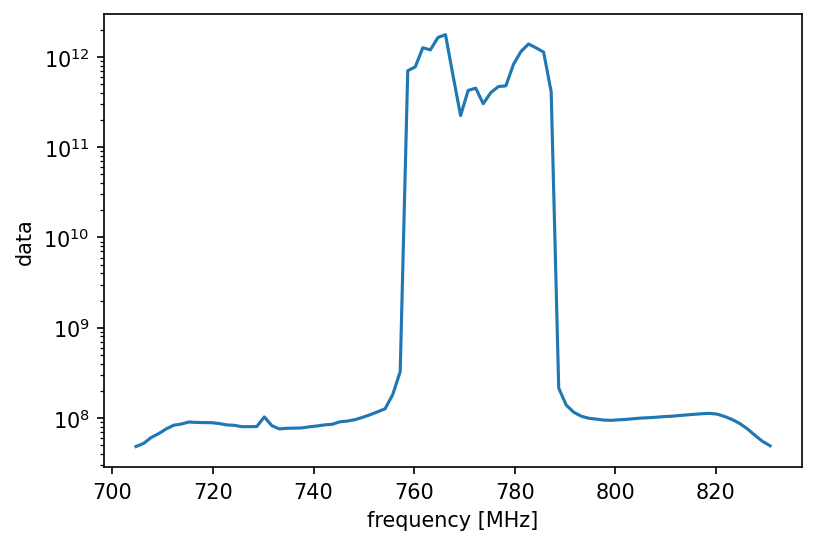

In [202]:
new_data.isel(time=0, polarization=0).plot()
plt.yscale("log")

In [209]:
dataset_dec = xr.Dataset(
    {
        "data": new_data,
        "flag": new_flag,
        "metdata": dataset.metadata
    }
)
dataset_dec

<xarray.Dataset>
Dimensions:        (frequency: 85, time: 110, polarization: 4, bin: 1, meta: 25)
Coordinates: (12/26)
  * frequency      (frequency) float32 704.7 706.2 707.7 ... 827.8 829.3 830.8
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    ...             ...
    AZ_DRIVE_RATE  (time) float64 -0.3738 -0.3214 -0.3 -0.3 ... -0.3 -0.3 -0.3
    ZE_DRIVE_RATE  (time) float64 0.0738 0.0214 0.0 0.0 ... 0.0837 0.1 0.1 0.059
    HOUR_ANGLE     (time) float64 340.8 340.8 340.8 340.8 ... 341.0 341.0 341.0
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
Dimensions without coordinates: time, polarization, bin, meta
Data variables:
    data           (time, polarization, frequency, bin) float32 4.831e+07 ......
    flag           (time, polarization, bin, frequency) float64 0.0 0.0 ... 0.0
    metdata        (time, meta) object 0.262 ... 97.6381

In [213]:
dataset

<xarray.Dataset>
Dimensions:        (time: 110, frequency: 1024, polarization: 4, bin: 1,
                    meta: 25)
Coordinates: (12/26)
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    AEST           (time) object b'22:19:18.16' ... b'22:20:15.30'
    ...             ...
    ZE_DRIVE_RATE  (time) float64 0.0738 0.0214 0.0 0.0 ... 0.0837 0.1 0.1 0.059
    HOUR_ANGLE     (time) float64 340.8 340.8 340.8 340.8 ... 341.0 341.0 341.0
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
  * frequency      (frequency) float32 704.0 704.1 704.3 ... 831.7 831.9 832.0
Dimensions without coordinates: time, polarization, bin, meta
Data variables:
    data           (time, polarization, frequency, bin) float32 4.83e+07 ... ...
    flag           (time, polarization, bin, frequency) int64 0 0 0 0 ... 0 0 0
    metadata       (time, meta) object 0.262 ... 97.6381

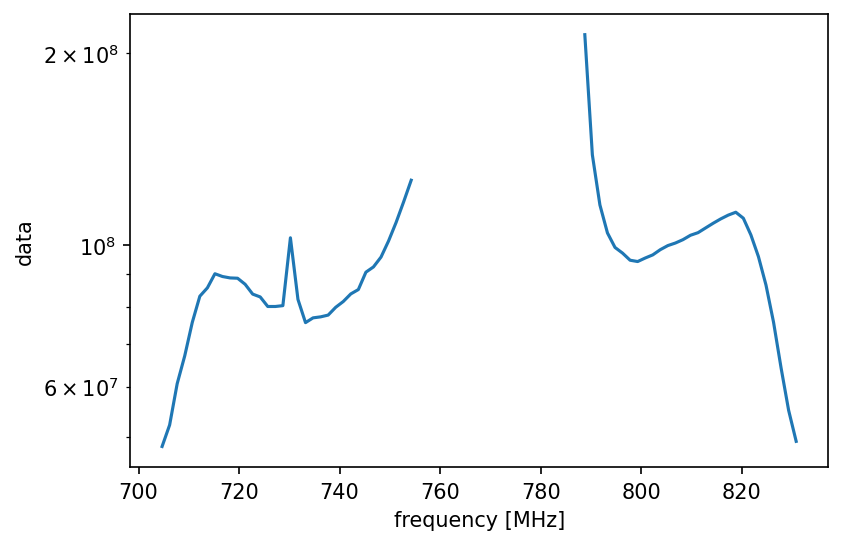

In [204]:
dataset_dec.where(dataset_dec.flag==0).data.isel(time=0, polarization=0).plot()
plt.yscale("log")

In [200]:
_decimate(
    dec_dset.data,
    dec_dset.flag.astype(bool),
    dask="parallelized",
    dim="original",
).compute()

ValueError: axes don't match array

In [ ]:
xarray.map_blocks(
    print
)

In [190]:
xr.apply_ufunc(
    _decimate,
    dec_dset.data,
    input_core_dims=[["original"]],
    output_core_dims=[["original"]],
    kwargs={"statistic": np.mean, "flag_spectrum": dec_dset.flag.astype(bool)},
    dask="parallelized",
    vectorize=False,
)

ValueError: `dtype` inference failed in `apply_gufunc`.

Please specify the dtype explicitly using the `output_dtypes` kwarg.

Original error is below:
------------------------
IndexError('boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 110')

Traceback:
---------
  File "/Users/tho822/miniconda3/lib/python3.9/site-packages/dask/array/core.py", line 464, in apply_infer_dtype
    o = func(*args, **kwargs)
  File "/var/folders/rg/tk14ndkj435d8d1yj25dbz1w00p7kq/T/ipykernel_20682/847905835.py", line 5, in _decimate
    mask_spec = spectrum[~flag_spectrum]


In [175]:
for idx, key in enumerate(dec_dset.dims.keys()):
    if key == "original":
        break
i

1

In [ ]:
chunks = {d:1 for d in data_xr_flg.dims}
chunks["frequency"] = len(self.astronomy_dataset.data.frequency)
data_xr_flg = data_xr_flg.chunk(chunks)

In [181]:
dec_dset.reduce(
    
)

<xarray.Dataset>
Dimensions:        (time: 110, original: 85, decimated: 12, polarization: 4,
                    bin: 1, meta: 25)
Coordinates:
    frequency      (original, decimated) float32 704.0 704.1 ... 831.4 831.5
Dimensions without coordinates: time, original, decimated, polarization, bin,
                                meta
Data variables: (12/28)
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    AEST           (time) object b'22:19:18.16' ... b'22:20:15.30'
    ...             ...
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
    data           (time, polarization, original, decimated, bin) float32 4.8...
    flag           (time, polarization, bin, original, decimated) int64 0 ... 0
    metadata       (time, meta) object 0.262 ... 97.6381

In [169]:
dec_dset

<xarray.Dataset>
Dimensions:        (time: 110, original: 85, decimated: 12, polarization: 4,
                    bin: 1, meta: 25)
Coordinates:
    frequency      (original, decimated) float32 704.0 704.1 ... 831.4 831.5
Dimensions without coordinates: time, original, decimated, polarization, bin,
                                meta
Data variables: (12/28)
    ELAPSED_TIME   (time) float64 0.262 0.786 1.311 1.835 ... 56.36 56.88 57.41
    TIME_DB        (time) object b'2020-04-06T12:19:17.26Z' ... b'2020-04-06T...
    MJD            (time) float64 5.895e+04 5.895e+04 ... 5.895e+04 5.895e+04
    UTC            (time) object b'12:19:17.26' ... b'12:20:14.41'
    UT_DATE        (time) object b'2020-04-06' b'2020-04-06' ... b'2020-04-06'
    AEST           (time) object b'22:19:18.16' ... b'22:20:15.30'
    ...             ...
    PARA_ANGLE     (time) float64 -154.2 -154.2 -154.2 ... -154.5 -154.5 -154.5
    WIND_DIR       (time) float64 9.0 9.0 9.0 9.0 9.0 ... 10.0 10.0 10.0 9.591
    WIND_SPD       (time) float64 98.62 103.9 102.9 97.65 ... 98.56 96.46 97.64
    data           (time, polarization, original, decimated, bin) float32 4.8...
    flag           (time, polarization, bin, original, decimated) int64 0 ... 0
    metadata       (time, meta) object 0.262 ... 97.6381

In [177]:
data_mask = dec_dset.where(dec_dset.flag==0).data.to_masked_array(copy=False)

In [180]:
data_mask.shape

(110, 4, 85, 12, 1)

In [ ]:
def _decimate(data: np.ma.MaskedArray, axis: int, statistic:Callable=np.mean) -> Tuple[np.ndarray, np.ndarray]:
    if 

In [87]:
for i in dataset.coarsen(**{axis: bins}, boundary="trim"):
    print(i)
    break

TypeError: 'DatasetCoarsen' object is not iterable

In [85]:
dataset.coarsen(**{axis: bins}, boundary="trim").reduce(print)

TypeError: 'axis' is an invalid keyword argument for print()

In [57]:
dataset.resample(frequency="10s").mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Float64Index'

In [22]:
xr.apply_ufunc(
    np.nanmean,
    dataset,
    input_core_dims=[["frequency"]],
    output_core_dims=[["frequency"]],
    kwargs={"axis": 0},
)

ValueError: applied function returned data with unexpected number of dimensions. Received 3 dimension(s) but expected 4 dimensions with names: ('time', 'polarization', 'bin', 'frequency')

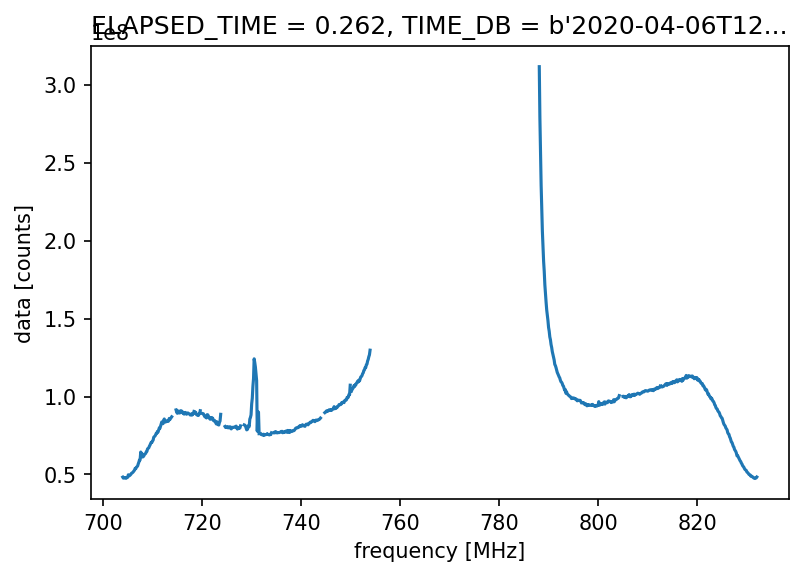

In [9]:
data_xr_flg.reduce(
    
)

In [ ]:
# Set chunks for parallel processing
data_xr = data.beam_0.band_SB0.data
flag_xr = data.beam_0.band_SB0.flag
chunks = {d:1 for d in data_xr.dims}

chunks["frequency"] = len(data_xr.frequency)
data_xr = data_xr.chunk(chunks)

test = xr.apply_ufunc(
    decimate,
    data_xr,
    input_core_dims=[["frequency"]],
    output_core_dims=[["frequency"]],
    kwargs=dict(
        freq=data_xr.frequency.values,
        bins=10,
        statistic="mean",
    ),
    dask="parallelized",
    vectorize=True,
    output_dtypes=(bool),
)

In [ ]:
freq = data_xr.frequency
cut_bins = pd.cut(
    freq,
    bins=np.arange(freq.values.min(), freq.values.max(), 10),
)
edges = cut_bins.categories.values
bins = edges.left

In [ ]:
def flagged_average(data):

In [ ]:
flag_xr.loc[dict(frequency=slice(750, 790))] = 1

In [ ]:
data_mask = data_xr.where(flag_xr == 0)
data_mask.isel(time=0, polarization=0, bin=0).plot()

In [ ]:
data_grp = data_xr.groupby_bins("frequency", bins=bins)
flag_grp = flag_xr.groupby_bins("frequency", bins=bins)

In [ ]:
xr.Dataset(
    {
        "data": data_xr,
        "flag": flag_xr,
        "junk": pd.DataFrame([])
    }
)

In [ ]:
for (_, d), (_,f) in zip(data_grp,flag_grp):
    print(d)
    print(f)
    break

In [ ]:
def decimate(spectrum_bin: np.ndarray, mask_bin: np.ndarray, statistic:Callable=np.mean, axis=None) -> Tuple[np.ndarray, np.ndarray]:
    if mask_bin.all():
        return statistic(spectrum_bin), 1
    else:
        mask_spec = spectrum_bin[~mask_bin.astype(bool)]
        return statistic(mask_spec), 0


In [ ]:
np.mean(d).compute()

In [ ]:
for (_, d), (_,f) in zip(data_grp,flag_grp):
    decimate(d, f)
    break

In [ ]:
test = data_xr.reduce(
    decimate, 
    dim="frequency", 
    # keep_attrs=True, 
    # keepdims=True,
    freq=data_xr.frequency.values,
    bins=10,
    statistic="mean",
)

In [ ]:
test.compute()

In [ ]:
nbconvert.__version__

In [ ]:
@dataclass
class SubBand:
    label: str
    filename: Path
    beam_label: str
    in_memory: bool = False
    # data: DataArray
    # flag: DataArray
    # metadata: Dataset
    def __post_init__(self):
        with h5py.File(self.filename, "r") as h5:
            sb_data = f"{self.beam_label}/{self.label}/astronomy_data/data"
            sb_freq = f"{self.beam_label}/{self.label}/astronomy_data/frequency"
            sb_para = f"{self.beam_label}/{self.label}/metadata/obs_params"
            has_flags = (
                "flag" in h5[f"{self.beam_label}/{self.label}/astronomy_data"].keys()
            )
            data = h5[sb_data]
            if has_flags:
                flag = h5[f"{self.beam_label}/{self.label}/astronomy_data/flag"]
                # Ensure flag has same shape as data
                flag_reshape = flag[:].copy()
                for i, s in enumerate(data.shape):
                    if i > len(flag_reshape.shape) - 1:
                        flag_reshape = np.expand_dims(flag_reshape, axis=-1)
                    else:
                        if flag_reshape.shape[i] == s:
                            continue
                        else:
                            flag_reshape = np.expand_dims(flag_reshape, axis=i)
                flag = flag_reshape
            else:
                flag = np.zeros_like(data)
            freq = h5[sb_freq]
            meta = h5[sb_para][:]
            meta_tab = Table(meta)
            if self.in_memory:
                data = np.array(data)
                freq = np.array(freq)
                flag = np.array(flag)
            names = meta.dtype.names
            coords = {name: ("time", meta[name]) for name in names}
            coords["frequency"] = freq
            dims = h5[sb_data].attrs["DIMENSION_LABELS"]

            # Need to isel beam 0 here - it will always be dimension 0
            data_xr = DataArray(
                data,
                dims=dims,
                coords=coords,
                name=f"{self.label}_data",
            ).isel(beam=0)
            flag_xr = DataArray(
                flag,
                dims=dims,
                coords=coords,
                name=f"{self.label}_flag",
            ).isel(beam=0)

            self.data = data_xr
            self.flag = flag_xr
            self.metadata = meta_tab.to_pandas()

@dataclass
class Beam:
    label: str
    filename: Path
    in_memory: bool = False

    def __post_init__(self):
        with h5py.File(self.filename, "r") as f:
            sb_avail = Table.read(f, path=self.label + "/metadata/band_params")
            self.subbands = [
                SubBand(
                    label=sb, 
                    filename=self.filename, 
                    beam_label=self.label,
                    in_memory=self.in_memory,
                ) for sb in sb_avail["LABEL"]
            ]
            for sb in self.subbands:
                self.__dict__[sb.label] = sb


@dataclass
class MetaData:

    filename: Path

    def __post_init__(self):
        with h5py.File(self.filename, "r") as f:
            meta = f["metadata"]
            self.beam_params = pd.DataFrame(np.array(meta["beam_params"]))
            self.history = pd.DataFrame(np.array(meta["history"]))
            self.primary_header = Table(np.array(meta["primary_header"]))

@dataclass
class SDHDF:

    filename: Path
    in_memory: bool = False

    def __post_init__(self):
        self.metadata = MetaData(self.filename)
        with h5py.File(self.filename, "r") as f:
            keys = list(f.keys())
            self.beams = [
                Beam(
                    label=key, 
                    filename=self.filename,
                    in_memory=self.in_memory,
                ) for key in keys if "beam_" in key
            ]
            for beam in self.beams:
                self.__dict__[beam.label] = beam


In [ ]:
fname = Path("~/data/parkes/uwl_200406_121917.extract.hdf").expanduser()
data = SDHDF(fname)

In [ ]:
data.metadata.primary_header

In [ ]:
import pandas as pd

In [ ]:
with h5py.File(fname, "r") as f:
    print(pd.DataFrame(f["metadata"]["primary_header"][:]))

In [ ]:
data.beam_0.subbands[0].data.isel(polarization=0).plot(y="RA_DEG")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data.beam_0.band_SB0

In [ ]:
data.beam_0.band_SB2.data.isel(polarization=0, bin=0).plot(norm=plt.cm.colors.LogNorm())

In [ ]:
data.beams.beam_0